## Binomial Random Variable 
- 이론과 실제(np.Random 으로 생성한 난수) 비교

* $n=10, p=0.3$인 Binomial Random Variable을 위한 rv 변수를 생성한다.
* 사용자가 입력한 size 개수 만큼의 난수를 생성하여 rvals1에 저장한다.
* size * 10 만큼의 난수를 생성하여 rvals2에 저장한다.
* 난수 생성 결과 rvals1과 rvals2에서 Binomial Random Variable이 가질 수 있는 모든 값에 대해 도수 분포를 구하고 비율을 구한다. 예를 들어 전체 100개의 난수 중 0의 값을 가지는 것이 3개라면 0에 대한 도수 분포 비율은 0.03이 된다.
* 난수 생성 결과의 도수 분포 비율을 이론적인 확률값과 비교하는 그래프를 그린다.

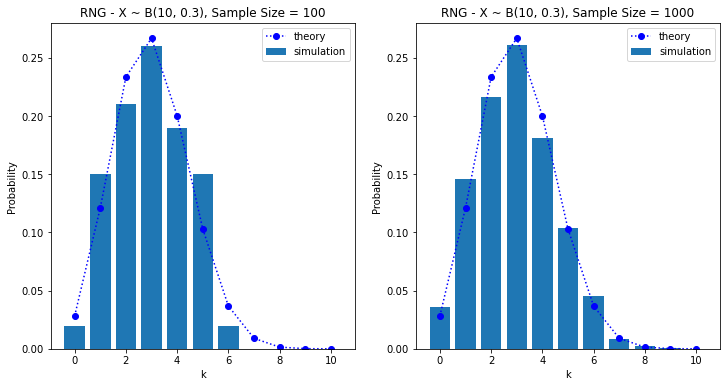

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(seed=1000)
n=10
p=0.3
size = 100#@param {type:"integer"}

rv = stats.binom(n,p)
Ks = np.arange(0,n+1)

rvals1 = rv.rvs(size=size)
rvals2 = rv.rvs(size=size*10)

plt.rcParams['figure.figsize'] = [12,6]
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#========== ENTER YOUR CODE ================= 
l1 = [0]*11
l2 = [0]*11
for i in range(len(rvals1)):
  l1[rvals1[i]] += 1/len(rvals1)

for i in range(len(rvals2)):
  l2[rvals2[i]] += 1/len(rvals2)

# print(l1)
# print(l2)

bins = np.arange(-0.5, 11.5, 1)

ax1.hist(bins[:-1], bins, weights = l1, rwidth=0.8, label = 'simulation')
ax2.hist(bins[:-1], bins, weights = l2, rwidth=0.8, label = 'simulation')

ax1.title.set_text('RNG - X ~ B(10, 0.3), Sample Size = 100')
ax2.title.set_text('RNG - X ~ B(10, 0.3), Sample Size = 1000')

ax1.set_xlabel('k')
ax1.set_ylabel('Probability')
ax2.set_xlabel('k')
ax2.set_ylabel('Probability')

ax1.plot(Ks, rv.pmf(Ks), 'b:o', label='theory')
ax2.plot(Ks, rv.pmf(Ks), 'b:o', label='theory')

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
#============================================ 

plt.show()